In [2]:
import numpy as np

In [8]:
import numpy as np

# XOR Input and Output
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])


In [17]:
# Activation Functions and Derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)


In [18]:
class MLP:
    def __init__(self, activation='sigmoid', lr=0.1, iterations=1000):
        self.lr = lr
        self.iterations = iterations
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(2, 2)
        self.b1 = np.zeros((1, 2))
        self.W2 = np.random.randn(2, 1)
        self.b2 = np.zeros((1, 1))

        if activation == 'sigmoid':
            self.act = sigmoid
            self.act_deriv = sigmoid_derivative
        elif activation == 'relu':
            self.act = relu
            self.act_deriv = relu_derivative

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = self.act(self.Z1)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = (output - y) * sigmoid_derivative(self.Z2)
        dW2 = self.A1.T @ dZ2 / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * self.act_deriv(self.Z1)
        dW1 = X.T @ dZ1 / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y):
        for _ in range(self.iterations):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)


In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-8)

def plot_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()



Testing with lr=0.1, iterations=1000, activation=sigmoid
Accuracy: 0.50, Precision: 0.50, Recall: 0.50, F1: 0.50


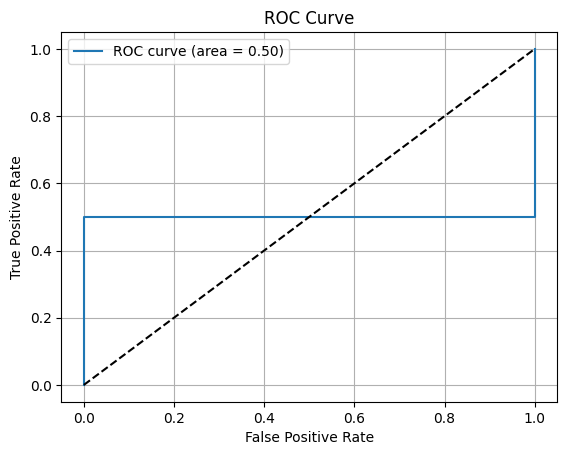


Testing with lr=0.5, iterations=5000, activation=relu
Accuracy: 0.75, Precision: 1.00, Recall: 0.50, F1: 0.67


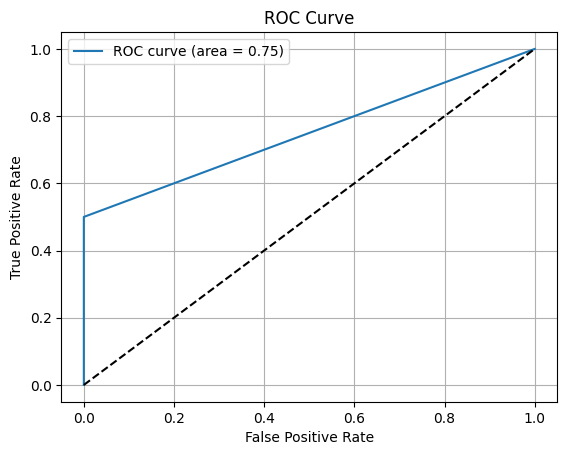

In [20]:
# Call the experiment block explicitly
if __name__ == "__main__":
    params = [
        {'lr': 0.1, 'iter': 1000, 'act': 'sigmoid'},
        {'lr': 0.5, 'iter': 5000, 'act': 'relu'},
    ]

    for p in params:
        print(f"\nTesting with lr={p['lr']}, iterations={p['iter']}, activation={p['act']}")
        model = MLP(activation=p['act'], lr=p['lr'], iterations=p['iter'])
        model.train(X, y)
        preds = model.predict(X)
        scores = model.forward(X)

        acc = accuracy(y, preds)
        prec = precision(y, preds)
        rec = recall(y, preds)
        f1 = f1_score(y, preds)

        print(f"Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}, F1: {f1:.2f}")
        plot_roc(y, scores)
